In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def get_data(name,lim):
    
   df = pd.read_csv(name)
   return df 

In [3]:
#LOAD DATABASE

df = get_data('execution_database.csv',1)


In [4]:
#gapminder[loc1,'continent'].value_counts()
df['Date'].value_counts().head()

12/09/1999    4
08/28/1987    3
04/22/1998    3
03/15/2000    3
06/26/2007    3
Name: Date, dtype: int64

In [7]:
#OLDEST PERSON EXECUTED OVERALL

oldest = df.max()

oldest



Age    83
dtype: int64

In [8]:
#df[df['A'].str.contains("hello")]
#SEARCH FOR PART OF NAME
name = df.loc[df['Name'].str.contains('Bundy')]
name

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
270,01/24/1989,Theodore Bundy,42,m,White,1 White Female(s),FL,S,Electrocution,No,No,No,No,Columbia


In [23]:
#SEARCH WHERE VICTIM(S) WERE FEMALE
victim = df.loc[df['Victim_Race_Sex'].str.contains("Female") == True]
victim.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
4,01/06/1994,Keith Wells,31,m,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada
6,01/12/2000,Earl Heiselbertz,48,m,White,2 White Female(s),TX,S,Lethal Injection,No,No,No,No,Sabine
8,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish


In [85]:
#SEARCH WHERE METHOD WAS ELECTROCUTION
elec = df.loc[df['Method'] == 'Electrocution']
elec.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
8,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
14,01/09/1985,Roosevelt Green,28,m,Black,1 White Female(s),GA,S,Electrocution,No,No,No,No,Brooks
20,01/10/1997,Billy Waldrop,44,m,White,1 White Male(s),AL,S,Electrocution,No,No,No,No,Talladega


In [24]:
#SEARCH WHERE AGE = X, AND SEX = M/F
df_n = df.loc[df['Age'] > 61] [df['Sex'] == 'm']

df_n.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
103,05/02/1997,Walter Hill,62,m,Black,2 Black Male(s)1 Black Female(s),AL,S,Electrocution,No,No,No,No,Jefferson
111,05/05/1999,Clydell Coleman,62,m,Black,1 Black Female(s),TX,S,Lethal Injection,No,No,No,No,McLennan
190,07/02/2003,Hilton Crawford,64,m,White,1 White Male(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
267,01/26/1984,Anthony Antone,66,m,White,1 White Male(s),FL,S,Electrocution,No,No,No,No,Hillsborough
297,01/24/2002,Ronald Spivey,62,m,White,1 White Male(s),GA,S,Lethal Injection,No,No,No,No,Muscogee


In [22]:
# AVERAGE OVERALL AGE

#date_range = df.loc[df['Juvenile'] == 'Yes']
#data = df.loc[['State'], age]
age_df = df.loc[df['Age']]
age_df.mean()


Age    37.841365
dtype: float64

In [20]:
#THE OLDEST PERSON EXECUTED IN TEXAS WAS

tx_df = df.loc[df['State']=='TX']
tx_df.max()

Date                      12/18/1986
Name                  Yosvanis Valle
Age                               67
Sex                                m
Race                           White
Victim_Race_Sex      4 White Male(s)
State                             TX
Region                             S
Method              Lethal Injection
Juvenile                         Yes
Federal                           No
Volunteer                        Yes
Foreign National                 Yes
County                          Wood
dtype: object

Text(0.5, 1.0, 'AGE OF EXECUTED PEOPLE IN TEXAS')

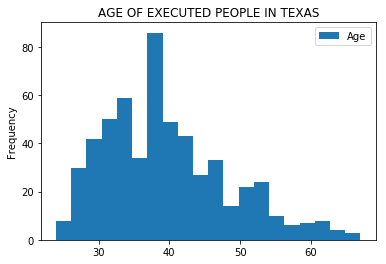

In [42]:
tx_df.plot.hist(bins = 20)
plt.title('AGE OF EXECUTED PEOPLE IN TEXAS')

In [23]:
#THE YOUNGEST PERSON EXECUTED IN TEXAS WAS

tx_df = df.loc[df['State']=='TX']
tx_df.min()

Date                       01/04/1995
Name                      Aaron Foust
Age                                24
Sex                                 f
Race                            Asian
Victim_Race_Sex     1 Asian Female(s)
State                              TX
Region                              S
Method               Lethal Injection
Juvenile                           No
Federal                            No
Volunteer                          No
Foreign National                   No
County                       Anderson
dtype: object

In [10]:
date_range = df.loc[df['State'] == 'LA']
date_range.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
8,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
23,01/08/1999,Dobie Williams,38,m,Black,1 White Female(s),LA,S,Lethal Injection,No,No,No,No,Sabine Parish
66,03/05/1993,Robert Sawyer,41,m,White,1 White Female(s),LA,S,Lethal Injection,No,No,No,No,Jefferson Parish
68,03/01/1996,Antonio James,42,m,Black,1 White Male(s),LA,S,Lethal Injection,No,No,No,No,Orleans Parish
79,04/05/1984,Elmo Sonnier,35,m,White,1 White Male(s)1 White Female(s),LA,S,Electrocution,No,No,No,No,Iberia Parish


Text(0.5, 0, 'BY STATE')

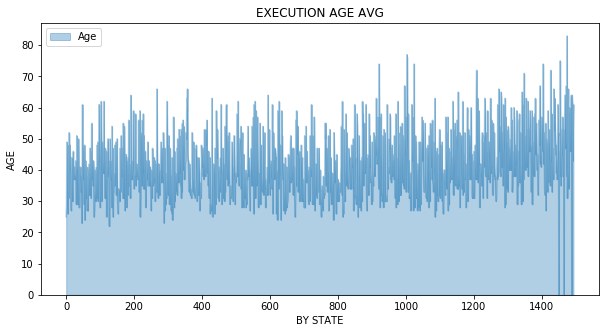

In [28]:
ax = df.plot(kind='area', alpha=0.35, figsize=(10, 5))

ax.set_title('EXECUTION AGE AVG')
ax.set_ylabel('AGE')
ax.set_xlabel('BY STATE')

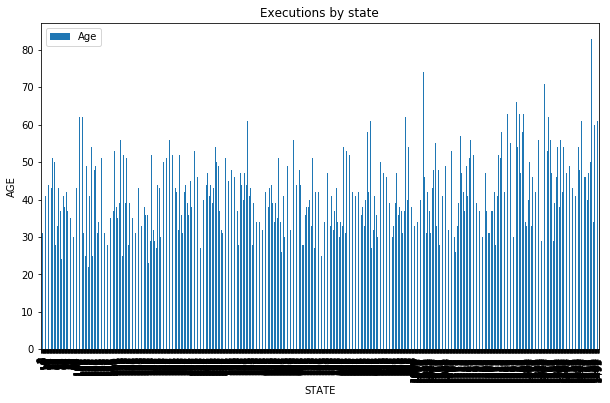

In [70]:
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('STATE') # add to x-label to the plot
plt.ylabel('AGE') # add y-label to the plot
plt.title('Executions by state') # add title to the plot

plt.show()